# Appendix D Simulation 


## D.3 Examples: Coverage of confidence intervals 

One of the most confusing concepts for beginners in statistics is the confidence interval. The *correct* interpretation of a $100(1-\alpha)\%$ confidence interval is that: 
> the procedure to construct the confidence interval will produce confidence intervals that cover the true parameter $100(1-\alpha)\%$ of the times upon drawing a new set of samples from the same population. 

This is hard to comprehend for anyone who does not know the idea of sampling distribution. However, with simulation, we can verify this statement on our own.

We will simulate data from a linear regression model 
\[
y = x \beta_1+\beta_0 + \epsilon,
\]
where $\epsilon$ follows a uniform distribution in $[0,5]$. The covariate $x$ will be drawn from a normal distribution with mean 10 and variance 4. 

In [4]:
set.seed(1)
n=50;
x=rnorm(n,mean=10,sd=2);
beta.true=c(20,0.15);
Ey = x*beta.true[2]+beta.true[1];
error.terms=rnorm(n)*5;
y=Ey+error.terms;


We can use `lm()` and `confint()` in `R` to fit a linear regression and obtain the confidence intervals for $\beta_1$ and $\beta_0$. 

In [7]:
fit.lm=lm(y~x+1)
alpha=0.025;
(CIs<-confint(fit.lm,level=1-alpha))

,1.25 %,98.75 %
(Intercept),11.702252,31.794191
x,-0.936107,1.008364


In the previous code, we (i) simulate data from a linear regression model and (ii) construct the confidence intervals for the unknown $\beta$s. We have thus simulated one instance from the scenario in consideration. We shall wrap up the code into a function, and use `replicate()` in `R` to simulate many more instances. 

In [9]:
simulate.one.instance<-function(x,beta.true,alpha){
    Ey = x*beta.true[2]+beta.true[1];
    n=length(x);
    error.terms=rnorm(n)*5;
    y=Ey+error.terms;
    fit.lm=lm(y~x+1)
    (CIs<-confint(fit.lm,level=1-alpha))
    return(CIs)
}

In [10]:
set.seed(1)
n=50;
x=rnorm(n,mean=10,sd=2);
beta.true=c(20,0.15);
alpha=0.025;


,1.25 %,98.75 %
(Intercept),11.702252,31.794191
x,-0.936107,1.008364


In [11]:
N.sim=1e4; #10000
sim.CIs=replicate(N.sim, simulate.one.instance(x=x,beta.true=beta.true,alpha=alpha))

Now to visualize the simulation results.

[1] 0.9778

[1] 0.975

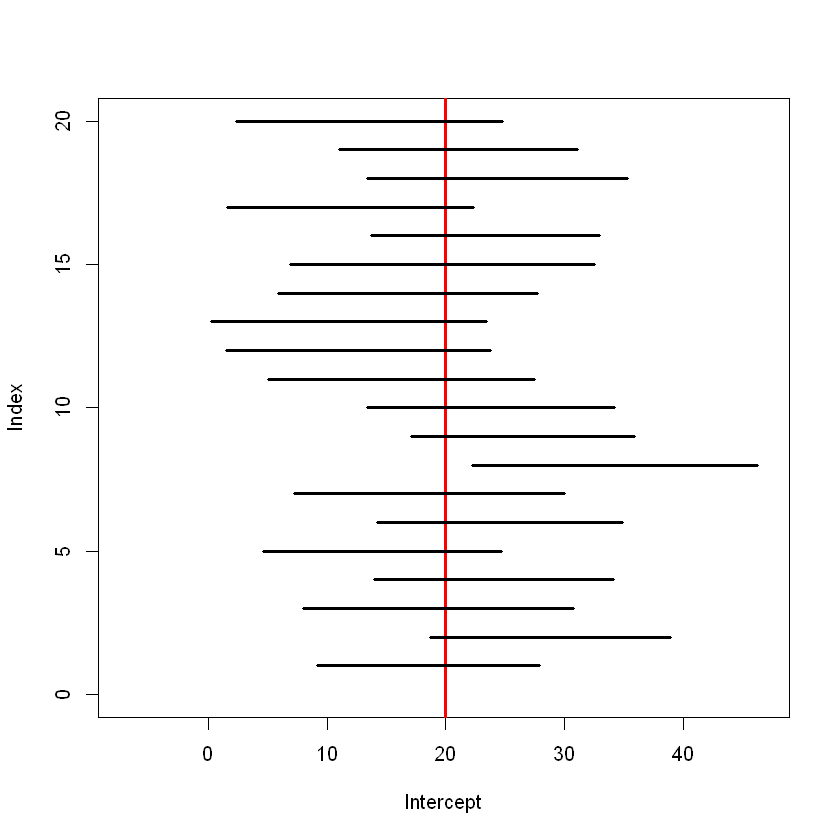

In [23]:
sum( (sim.CIs[1,1,]< beta.true[1])    &  (sim.CIs[1,2,] >beta.true[1] ))/N.sim
1-alpha
plot(0,0, col="white", xlim=c(min(sim.CIs[1,1,]),max(sim.CIs[1,2,]) ), ylim=c(0,20),
    xlab="Intercept", ylab="Index")
abline(v=beta.true[1],lwd=3,col='red')
for(i in 1:20){
    segments(sim.CIs[1,1,i], i, sim.CIs[1,2,i], i, lwd=3)
}